In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sentiment=pd.read_csv('/content/fear_greed_index.csv')
trades=pd.read_csv('/content/historical_data.csv')
print('Sentiment')
print(sentiment.head())
print('Trades')
print(trades.head())



Sentiment
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Trades
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  

In [58]:
print('Sentiment Shape:',sentiment.shape)
print('Trades Shape:',trades.shape)

Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)


In [59]:
print("\nMissing Values in Sentiment:")
print(sentiment.isnull().sum())
print("\nMissing Values in Trades:")
print(trades.isnull().sum())


Missing Values in Sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values in Trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [60]:
print(sentiment.dtypes)
print(trades.dtypes)

timestamp          int64
value              int64
classification    object
date              object
dtype: object
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [63]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment['Date']=sentiment['date'].dt.date
trades['Date']=trades['Timestamp IST'].dt.date

In [64]:
print(sentiment[['date','Date']].head())
print(trades[['Timestamp IST','Date']].head())

        date        Date
0 2018-02-01  2018-02-01
1 2018-02-02  2018-02-02
2 2018-02-03  2018-02-03
3 2018-02-04  2018-02-04
4 2018-02-05  2018-02-05
        Timestamp IST        Date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02


In [65]:
data=trades.merge(sentiment[['Date','classification']],on='Date',how='left')
print('Merged Data')
print(data.head())

Merged Data
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \

In [66]:
daily_activity=data.groupby(['Date','classification']).size().reset_index(name='trade_count')
daily_activity.head()

,Date,classification,trade_count
0,2023-05-01,Greed,3
1,2023-12-05,Extreme Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


In [67]:
daily_pnl=data.groupby(['Date','classification'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,Date,classification,Closed PnL
0,2023-05-01,Greed,0.000000
1,2023-12-05,Extreme Greed,0.000000
2,2023-12-14,Greed,-205.434737
3,2023-12-15,Greed,-24.632034
4,2023-12-16,Greed,0.000000


In [68]:
risk_behavior = data.groupby('classification')['Size USD'].mean().reset_index()
risk_behavior

,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


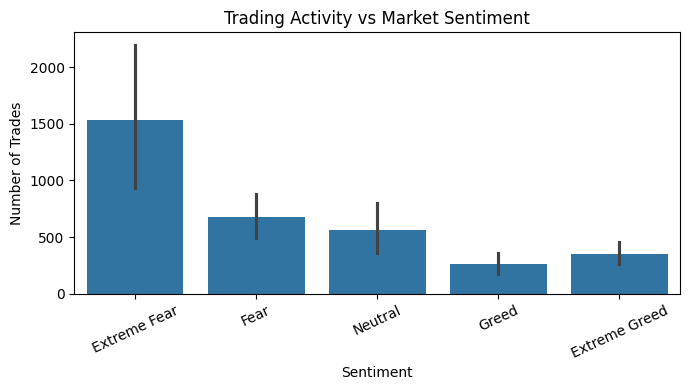

In [69]:
plt.figure(figsize=(7,4))
order = ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
sns.barplot(
    data=daily_activity,
    x='classification',
    y='trade_count',
    order=order
)
plt.title("Trading Activity vs Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")

plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

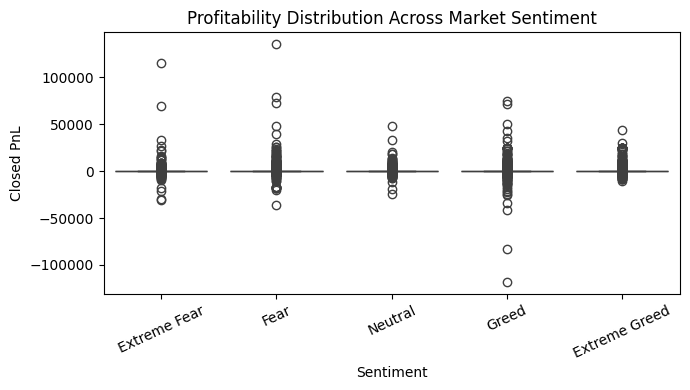

In [70]:
plt.figure(figsize=(7,4))
order = ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
sns.boxplot(
    data=data,
    x='classification',
    y='Closed PnL',
    order=order
)
plt.title("Profitability Distribution Across Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")

plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

Additional Behavioral Analysis

To better understand how traders were actually behaving in different market moods, I explored win rates, activity levels per trader,and risk-adjusted performance across the sentiment categories.

In [71]:
data['is_profit'] = data['Closed PnL'] > 0

win_rate = (
    data.groupby('classification')['is_profit']
    .mean()
    .reset_index(name='win_rate')
)

win_rate

,classification,win_rate
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


In [72]:
trader_activity = (
    data.groupby(['classification','Account'])
    .size()
    .reset_index(name='trades_per_trader')
)

avg_trader_activity = (
    trader_activity.groupby('classification')['trades_per_trader']
    .mean()
    .reset_index(name='avg_trades_per_trader')
)

avg_trader_activity

,classification,avg_trades_per_trader
0,Extreme Fear,668.750000
1,Extreme Greed,1333.066667
2,Fear,1932.406250
3,Greed,1622.677419
4,Neutral,1215.677419


In [73]:
trader_activity = (
    data.groupby(['classification','Account'])
    .size()
    .reset_index(name='trades_per_trader')
)

avg_trader_activity = (
    trader_activity.groupby('classification')['trades_per_trader']
    .mean()
    .reset_index(name='avg_trades_per_trader')
)

avg_trader_activity

,classification,avg_trades_per_trader
0,Extreme Fear,668.750000
1,Extreme Greed,1333.066667
2,Fear,1932.406250
3,Greed,1622.677419
4,Neutral,1215.677419


**Overall, emotional market conditions seem to push traders to act more and create more variability in results, without actually improving consistency, which makes sentiment better suited as a risk indicator than a profit signal.**

**Key Insights**

1.Trading activity increases sharply during Fear and Extreme Fear periods.
   This suggests traders are more reactive in uncertain markets, likely adjusting positions,
   managing losses, or attempting short-term opportunities rather than following structured strategies.

2.Despite higher optimism during Greed phases, profitability does not improve in a consistent way.
   This indicates that positive sentiment encourages participation, but does not necessarily create an edge.

3.Emotional market conditions lead to wider variability in outcomes.
   Traders are not uniformly successful or unsuccessful — results become less predictable,
   pointing to behavior-driven execution rather than disciplined decision-making.

4.Additional behavioral metrics show that increased activity during emotional periods
   comes more from changes in trader behavior than from improved trade quality.
   In other words, sentiment influences how much traders act, not how well they perform.

Overall, the analysis suggests that market sentiment is better interpreted as a signal of behavioral risk
rather than a direct indicator of profitability, making it useful for monitoring trading discipline
and managing exposure during emotionally charged market phases.

**Recommendations**

From the analysis, it’s clear that market sentiment affects how traders behave more than how successfully they trade.
This means sentiment is better used as a tool to monitor behavioral risk rather than as a signal to make trading decisions.

**Some practical ways this insight can be used:**

- Keep an eye on sudden increases in trading activity during Fear phases, as they may reflect reactive or emotionally driven participation.
- Introduce tighter risk controls when sentiment becomes extreme, since performance tends to become more inconsistent.
- Use sentiment as background context to support strategies, instead of relying on it as a standalone indicator.

In short, being aware of market sentiment can help manage risk and reduce emotionally influenced decisions, even if it doesn’t directly improve profitability.